##Feature Engineering and Missing Data Handling##

##Handling Missing Values##


**1. Identifying Missing Values**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import joblib
warnings.filterwarnings('ignore')

In [2]:
#Load the train and test datasets into dataframes
train_df = pd.read_csv('../../dataset/train.csv')

In [3]:
#Get the number of missing values in each column and their percentage
missing_values = train_df.isnull().sum()
missing_percentage = (missing_values / len(train_df)) * 100

#Put them in a dataframe to show the results
missing_data = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})
missing_data[missing_data['Missing Values'] > 0]

,Missing Values,Percentage
fc,5,0.25
four_g,5,0.25
int_memory,5,0.25
m_dep,5,0.25
mobile_wt,4,0.20
n_cores,4,0.20
pc,5,0.25
px_height,4,0.20
px_width,2,0.10
ram,2,0.10


**2. Understanding the Nature of Missing Values**

There are 3 types of missing values:

* **MCAR (Missing Completely at Random):** Missing values occur by chance and are unrelated to any other variables in the dataset.

* **MNAR (Missing Not at Random):** Missing values are related to the missing values themselves or to other variables in the dataset.

* **MAR (Missing at Random):** Missing values are related to other observed variables in the dataset, but not to the missing values themselves.

We need to identify which type of missing data we have here



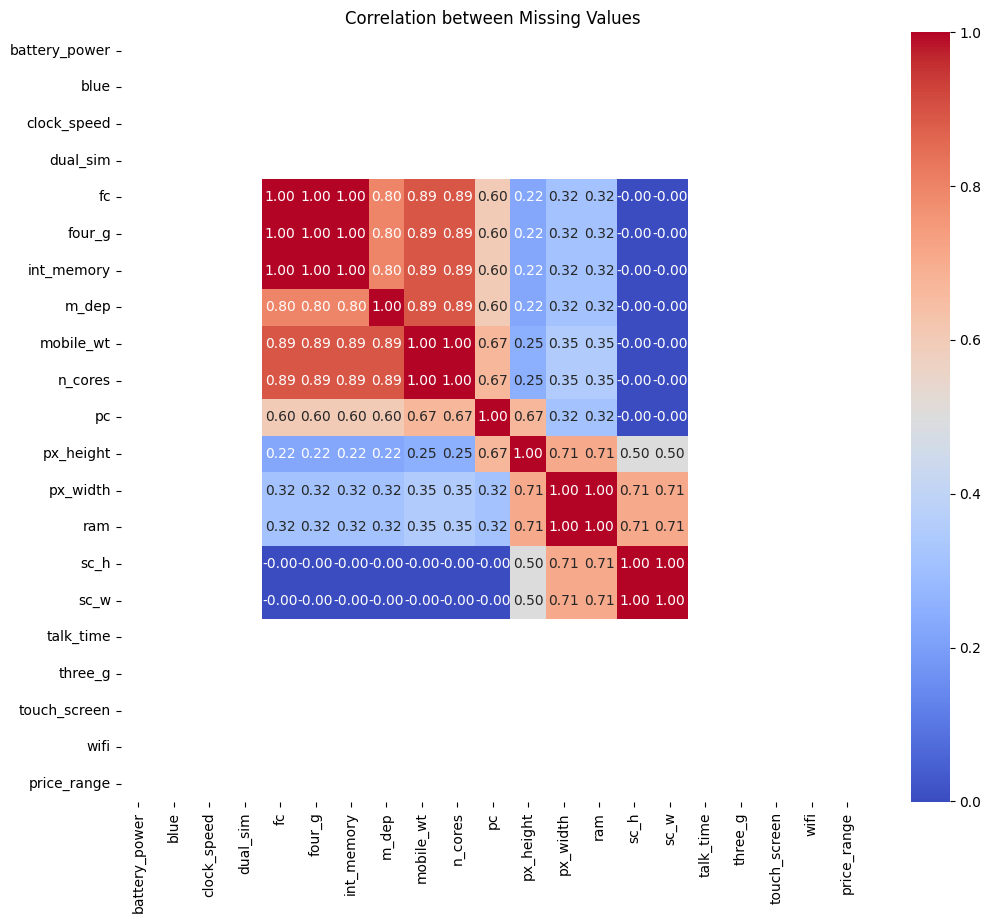

In [4]:
# Calculate the correlation between missing values
missing_corr = train_df.isnull().corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(missing_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation between Missing Values')
plt.show()

* Heatmap shows there are no strong correlations between missing values which mean that missing values are MCAR (Missing Completly At Random) so we can impute them in any way like Mean, Mode, Median or even removing whole row


**3. Imputing Missing Values**
* We will use Mode imputation for categorical data and Mean imputation for numeric data

In [5]:
for column in train_df.columns:
    # Check if the column has missing values
    if train_df[column].isnull().any():
        # Check if the column's data type is numeric
        if pd.api.types.is_numeric_dtype(train_df[column]):
            # Impute missing values with the mean of the column
            train_df[column].fillna(train_df[column].mean(), inplace=True)
        else:
            # Impute missing values with the mode of the column
            train_df[column].fillna(train_df[column].mode()[0], inplace=True)

In [6]:
#Making sure there is no missing data
missing = train_df.isnull().sum()
missing

,0
battery_power,0
blue,0
clock_speed,0
dual_sim,0
fc,0
four_g,0
int_memory,0
m_dep,0
mobile_wt,0
n_cores,0


##Feature Engineering##

**1. Merging and Creating New Features**
* Screen Size : which is sc_h (Screen Height) * sc_w (Screen Width)


In [7]:
train_df['sc_size'] = train_df['sc_h'] * train_df['sc_w']

**2. Applying Log Transformation**

* We need to apply Log Transformation to some features like Internal Memory, RAM and Battery Power to reduce skewness in values


In [8]:
#Applying log transformation to 'ram', 'int_memory', and 'battery_power'
train_df['log-ram'] = np.log1p(train_df['ram'])
train_df['log-int_memory'] = np.log1p(train_df['int_memory'])
train_df['log-battery_power'] = np.log1p(train_df['battery_power'])

**3. Standarization of Features**
* We need to do Normalization or Standarization to numeric features since they vary in range so we need to squash them to specific range
* Min-Max Scaling or Z-Score Normalization could be applied here, We will stick with Z-Score since its the most default and does not get affected by outliers

In [9]:
from sklearn.preprocessing import StandardScaler

numeric_features = ['battery_power', 'clock_speed', 'fc', 'int_memory', 'm_dep', 'mobile_wt',
                      'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time']
scaler = StandardScaler()

#Fit the scaler to your numeric features and transform them
train_df[numeric_features] = scaler.fit_transform(train_df[numeric_features])


In [10]:
train_df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,sc_w,talk_time,three_g,touch_screen,wifi,price_range,sc_size,log-ram,log-int_memory,log-battery_power
0,-0.902597,0,0.830779,0,-0.764629,0.0,-1.382405,0.339276,1.350676,-1.101463,...,0.283250,1.462493,0,0,1,1,63.0,7.843849,2.079442,6.736967
1,-0.495139,1,-1.253064,1,-0.995615,1.0,1.156334,0.686381,-0.120727,-0.664034,...,-0.635188,-0.734267,1,1,0,2,51.0,7.875499,3.988984,6.929517
2,-1.537686,1,-1.253064,1,-0.533642,1.0,0.494054,1.380591,0.133939,0.210825,...,-0.864797,-0.368140,1,1,0,2,22.0,7.864804,3.737670,6.335054
3,-1.419319,1,1.198517,0,-0.995615,0.0,-1.216835,1.033486,-0.262208,0.648255,...,0.512860,-0.002014,1,0,0,2,128.0,7.926603,2.397895,6.423247
4,1.325906,1,-0.395011,0,2.007209,1.0,0.659624,0.339276,0.020754,-1.101463,...,-0.864797,0.730240,1,1,0,1,16.0,7.252762,3.806662,7.507690


In [11]:
#Save the cleaned dataframe to a new CSV file
train_df.to_csv('cleaned_train.csv', index=False)

In [12]:
#Save the feature engineering model
joblib.dump(scaler, 'scaler_model.pkl')

['scaler_model.pkl']